### Exercise 08.1/2

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity.

La funziona d'onda di prova è data da:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Essa dipende da due parametri, $\sigma$ e $\mu$, mentre il potenziale usato per risolvere l'equazione di Schroedinger è:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$


Innanzitutto ho cercato i parametri in grado di minimizzare l'energia del sistema. Per far questo, mediante il seguente script Python, ho effettuato numerose simulazioni Monte Carlo utilizzando diversi valori di $\mu$ e $\sigma$ e calcolando la relativa energia.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import subprocess
from shutil import *
from glob import glob


mu=np.arange(0.7,0.9,0.005)
sigma=np.arange(0.5,0.7,0.005)

with open('input.dat', 'r') as file:
  data = file.readlines()

Ene=10;

for i in range(len(mu)):
  data[0]=str(mu[i])+"\n"
  for j in range(len(sigma)):
    data[1]=str(sigma[j])+"\n"
    with open('input.dat', 'w') as file:
      file.writelines( data )
    cmd= "./Monte_Carlo.exe"
    value = subprocess.call(cmd, shell = True)

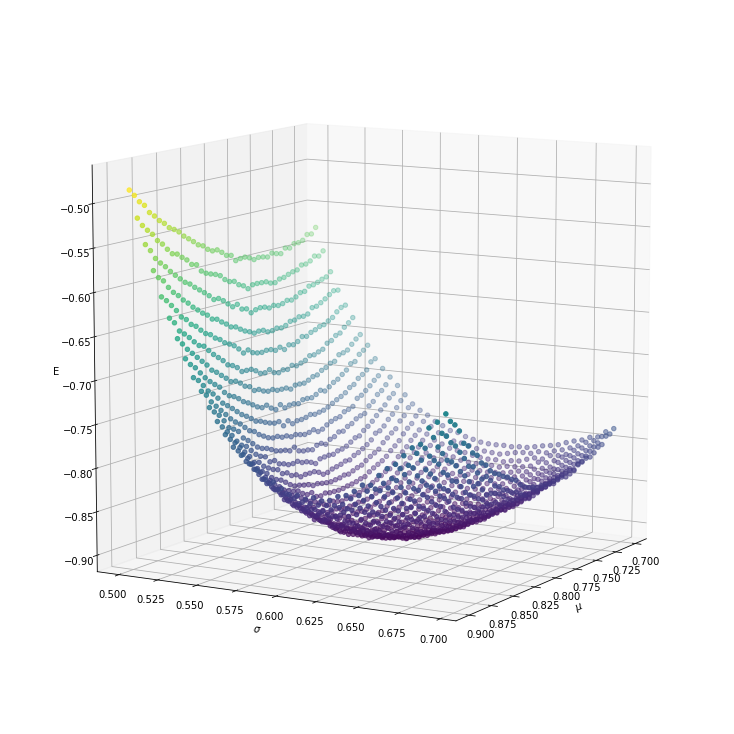

Parametri
Mu= 0.81
Sigma= 0.615


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Mu= np.loadtxt("./8.1_2/Ave_int_par.dat", usecols=(2), unpack='true')
Sigma= np.loadtxt("./8.1_2/Ave_int_par.dat", usecols=(3), unpack='true')
Ene= np.loadtxt("./8.1_2/Ave_int_par.dat", usecols=(0), unpack='true')


fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(Mu, Sigma, Ene, c=Ene, marker='o')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel('E')
ax.view_init(10, 30)
plt.show()

print("Parametri")
index_min=np.argmin(Ene)
print("Mu=", Mu[index_min])
print("Sigma=", Sigma[index_min])

Utilizzando i parametri sopra trovati per $\mu$ e $\sigma$ procedo con l'esercizio 08.2.

### Esercizio 08.2
- As usual, <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$

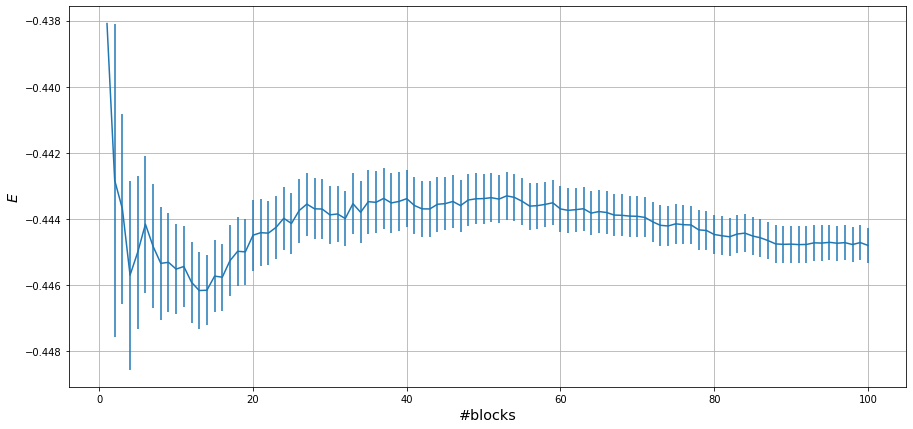

In [4]:
blk,Ene,dev_Ene= np.loadtxt("./8.1_2/output.Integral.dat", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(15,7))
plt.errorbar(blk,Ene,yerr=dev_Ene)
plt.xlabel('#blocks',fontsize='x-large')
plt.ylabel(r'$E$',fontsize='x-large')
plt.grid(True)
plt.show()

- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation.

Ground state energy:  -0.46046171923741636


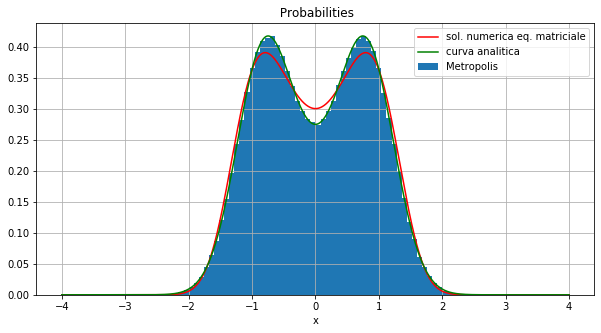

In [10]:
import numpy as np
import math
def Vpot(x):
    return (x**2 - 2.5)*x**2
    
hbar = 1
m = 1
a = 8
N = 1000 # number of iterations
mu = 0.81
sigma = 0.615

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
pi = 3.14159

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

index, x1, y1 = np.loadtxt("./8.1_2/Distr/Prob_distr0.810000_0.615000.out", usecols=(0,1,2), delimiter='\t', unpack='true')

Eval = ( np.exp(-0.5*(((x-mu)/sigma)**2)) + np.exp(-0.5*(((x+mu)/sigma)**2)) )**2;
norm = 2*((pi**0.5)*sigma) *   ((math.exp(-(mu**2)/(sigma**2))) +1)

# Plot a few things
plt.figure(figsize=(10,5))
plt.bar(x1, y1, width=0.08, label='Metropolis')
plt.grid(True)
plt.plot(x,(psi[0])**2,color="r", label='sol. numerica eq. matriciale')
plt.plot(x, Eval/norm, color="g", label='curva analitica')

plt.title(" Probabilities")
plt.legend();
plt.xlabel("x")
plt.grid(True)

### Exercise 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

<span style="color:red">Compare your results with those obtained with your VMC code</span>. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?

<span style="color:red">Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.</span>

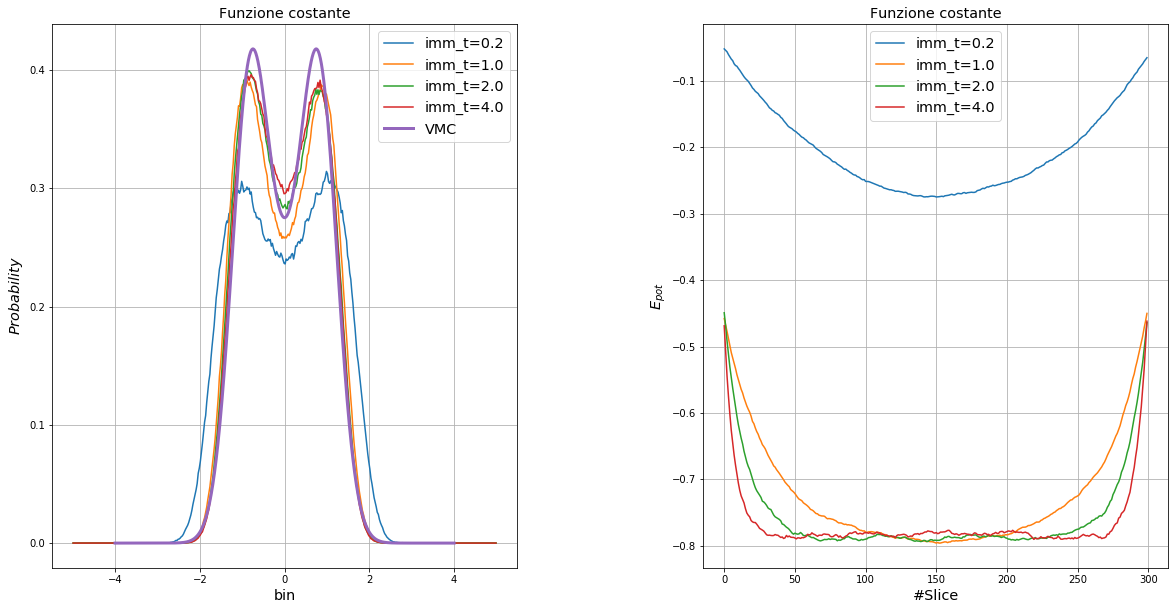

In [23]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import math

pi = 3.14159
a = 8
N = 1000 # number of iterations
x = np.linspace(-a/2, a/2, N)
mu = 0.81
sigma = 0.615
Eval = ( np.exp(-0.5*(((x-mu)/sigma)**2)) + np.exp(-0.5*(((x+mu)/sigma)**2)) )**2;
norm = 2*((pi**0.5)*sigma) *   ((math.exp(-(mu**2)/(sigma**2))) +1)


#funzione costante
current_position02,hist_average02,error02= np.loadtxt("../QMC_1D/const/probability0.2.dat", usecols=(0,1,2), unpack='true')
#current_position08,hist_average08,error8= np.loadtxt("../QMC_1D/const/probability0.8.dat", usecols=(0,1,2), unpack='true')
current_position1,hist_average1,error1= np.loadtxt("../QMC_1D/const/probability1.dat", usecols=(0,1,2), unpack='true')
current_position2,hist_average2,error2= np.loadtxt("../QMC_1D/const/probability2.dat", usecols=(0,1,2), unpack='true')
current_position4,hist_average4,error4= np.loadtxt("../QMC_1D/const/probability4.dat", usecols=(0,1,2), unpack='true')
#current_position8,hist_average8,error8= np.loadtxt("../QMC_1D/const/probability8.dat", usecols=(0,1,2), unpack='true')
#current_position15,hist_average15,error15= np.loadtxt("../QMC_1D/const/probability15.dat", usecols=(0,1,2), unpack='true')
index, x1, y1 = np.loadtxt("Distr/Prob_distr0.810000_0.615000.out", usecols=(0,1,2), delimiter='\t', unpack='true')

time_slice02,E_pot02,E_pot_error02= np.loadtxt("../QMC_1D/const/potential0.2.dat", usecols=(0,1,2), unpack='true')
#time_slice08,E_pot08,E_pot_error8= np.loadtxt("../QMC_1D/const/potential0.8.dat", usecols=(0,1,2), unpack='true')
time_slice1,E_pot1,E_pot_error1= np.loadtxt("../QMC_1D/const/potential1.dat", usecols=(0,1,2), unpack='true')
time_slice2,E_pot2,E_pot_error2= np.loadtxt("../QMC_1D/const/potential2.dat", usecols=(0,1,2), unpack='true')
time_slice4,E_pot4,E_pot_error4= np.loadtxt("../QMC_1D/const/potential4.dat", usecols=(0,1,2), unpack='true')
#time_slice8,E_pot8,E_pot_error8= np.loadtxt("../QMC_1D/const/potential8.dat", usecols=(0,1,2), unpack='true')
#time_slice15,E_pot15,E_pot_error15= np.loadtxt("../QMC_1D/const/potential15.dat", usecols=(0,1,2), unpack='true')

G = gridspec.GridSpec(1,2)
f = plt.figure(figsize=(20,10))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(current_position02,hist_average02,label="imm_t=0.2")
#fig_1.plot(current_position08,hist_average08,label="imm_t=0.8")
fig_1.plot(current_position1,hist_average1,label="imm_t=1.0")
fig_1.plot(current_position2,hist_average2,label="imm_t=2.0")
fig_1.plot(current_position4,hist_average4,label="imm_t=4.0")
#fig_1.plot(current_position4,hist_average8,label="imm_t=8.0")
#fig_1.plot(current_position15,hist_average15,label="imm_t=15")

fig_1.set_title(r'Funzione costante',fontsize='x-large')
fig_1.set_xlabel('bin',fontsize='x-large')
fig_1.set_ylabel('$Probability$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

plt.plot(x, Eval/norm, linewidth=3.0, label='VMC')
plt.legend(fontsize='x-large')
#plt.bar(x1, y1, width=0.08)


fig_2=plt.subplot(G[0, 1])
fig_2.plot(time_slice02,E_pot02,label="imm_t=0.2")
#fig_2.plot(time_slice08,E_pot08,label="imm_t=0.8")
fig_2.plot(time_slice1,E_pot1,label="imm_t=1.0")
fig_2.plot(time_slice2,E_pot2,label="imm_t=2.0")
fig_2.plot(time_slice4,E_pot4,label="imm_t=4.0")
#fig_2.plot(time_slice8,E_pot8,label="imm_t=8.0")
#fig_2.plot(time_slice15,E_pot15,label="imm_t=15")

fig_2.set_title(r'Funzione costante',fontsize='x-large')
fig_2.set_xlabel('#Slice',fontsize='x-large')
fig_2.set_ylabel(r'$E_{pot}$',fontsize='x-large')
fig_2.legend(fontsize='x-large')
fig_2.grid(True)

plt.show()

In questo primo caso la funzione d'onda Trial che provo a proiettatare sul ground state è la $\textbf{funzione costante}$ $\psi=1$.
Evidentemente essa è molto diversa dal ground state di una particella sottoposta al potenziale $V(x) = x^4 - \frac{5}{2}x^2$, tuttavia, commentando i risultati ottenuti, provo a mostrare come sia possibile ugualmente campionarlo, mettendo in luce le potenzialità del metodo PIGS.

Nei due grafici ho riportato a sinistra le distribuzioni di probabilità che si ottengono impostando diversi tempi di propagazione immaginari e quella ottenuta con il metodo VMC. Nel grafico di destra sono riportati invece l'energia potenziale in funzione del numero di slices per i medesimi tempi di propagazione.

È noto che il modulo quadro della funzione d'onda viene campionato tra 120 e 180 time slice.
Concentrandomi sul grafico dell'energia potenziale noto che, qualunque sia il tempo immaginario, gli stati proiettati hanno un valore di energia che parte da 0.5 all'estremo destro e sinistro del polimero. Poi pian piano il bra e il ket, a seconda del tempo di propagazione immaginario, diventano sempre più simili al ground state, cosa che avviene effettivamente solo nella regione centrale.
Ora, con funzione d'onda Trial costante osserviamo che finché $\tau>=2$ è possibile raggiungere la configurazione di ground state nell'intervallo [120, 180] time slice. Come conseguenza diretta di ciò il modulo quadro della funzione d'onda campionata riesce a convergere a quello di riferimento, ottenuta con VLC. Per $\tau$ minori di 2 ciò non accade.

In conclusione, essendo che la funzione di Trial è molto lontana da quella vera, esiste un tempo immaginario di propagazione minimo ($\tau=2$) sia per il bra che per il ket prima di arrivare a campionare l'esatto moto di punto zero.


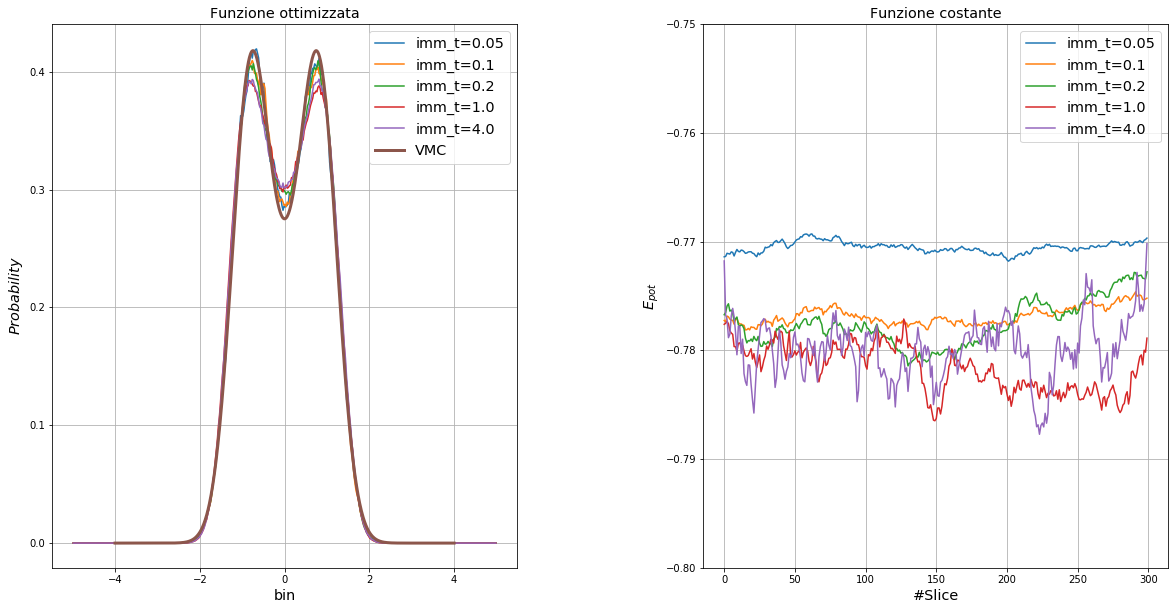

In [3]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import math

pi = 3.14159
a = 8
N = 1000 # number of iterations
x = np.linspace(-a/2, a/2, N)
mu = 0.81
sigma = 0.615
Eval = ( np.exp(-0.5*(((x-mu)/sigma)**2)) + np.exp(-0.5*(((x+mu)/sigma)**2)) )**2;
norm = 2*((pi**0.5)*sigma) *   ((math.exp(-(mu**2)/(sigma**2))) +1)

#funzione ottimizzata
current_position005,hist_average005,error005= np.loadtxt("./QMC_1D/opt/probability0.05.dat", usecols=(0,1,2), unpack='true')
current_position01,hist_average01,error01= np.loadtxt("./QMC_1D/opt/probability0.1.dat", usecols=(0,1,2), unpack='true')
current_position02,hist_average02,error02= np.loadtxt("./QMC_1D/opt/probability0.2.dat", usecols=(0,1,2), unpack='true')
current_position1,hist_average1,error1= np.loadtxt("./QMC_1D/opt/probability1.dat", usecols=(0,1,2), unpack='true')
current_position4,hist_average4,error4= np.loadtxt("./QMC_1D/opt/probability4.dat", usecols=(0,1,2), unpack='true')
index, x1, y1 = np.loadtxt("./8.1_2/Distr/Prob_distr0.810000_0.615000.out", usecols=(0,1,2), delimiter='\t', unpack='true')

time_slice005,E_pot005,E_pot_error005= np.loadtxt("./QMC_1D/opt/potential0.05.dat", usecols=(0,1,2), unpack='true')
time_slice01,E_pot01,E_pot_error01= np.loadtxt("./QMC_1D/opt/potential0.1.dat", usecols=(0,1,2), unpack='true')
time_slice02,E_pot02,E_pot_error02= np.loadtxt("./QMC_1D/opt/potential0.2.dat", usecols=(0,1,2), unpack='true')
time_slice1,E_pot1,E_pot_error1= np.loadtxt("./QMC_1D/opt/potential1.dat", usecols=(0,1,2), unpack='true')
time_slice4,E_pot4,E_pot_error4= np.loadtxt("./QMC_1D/opt/potential4.dat", usecols=(0,1,2), unpack='true')

G = gridspec.GridSpec(1,2)
f = plt.figure(figsize=(20,10))
f.subplots_adjust(hspace=0.4, wspace=0.4)
fig_1=plt.subplot(G[0, 0])
fig_1.plot(current_position005,hist_average005,label="imm_t=0.05")
fig_1.plot(current_position01,hist_average01,label="imm_t=0.1")
fig_1.plot(current_position02,hist_average02,label="imm_t=0.2")
fig_1.plot(current_position1,hist_average1,label="imm_t=1.0")
fig_1.plot(current_position4,hist_average4,label="imm_t=4.0")

fig_1.set_title(r'Funzione ottimizzata',fontsize='x-large')
fig_1.set_xlabel('bin',fontsize='x-large')
fig_1.set_ylabel('$Probability$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

#plt.bar(x1, y1, width=0.08)
plt.plot(x, Eval/norm, linewidth=3.0, label='VMC')
plt.legend(fontsize='x-large')

fig_2=plt.subplot(G[0, 1])
fig_2.plot(time_slice005,E_pot005,label="imm_t=0.05")
fig_2.plot(time_slice01,E_pot01,label="imm_t=0.1")
fig_2.plot(time_slice02,E_pot02,label="imm_t=0.2")
fig_2.plot(time_slice1,E_pot1,label="imm_t=1.0")
fig_2.plot(time_slice4,E_pot4,label="imm_t=4.0")
fig_2.set_title(r'Funzione costante',fontsize='x-large')
fig_2.set_xlabel('#Slice',fontsize='x-large')
fig_2.set_ylabel(r'$E_{pot}$',fontsize='x-large')
fig_2.legend(fontsize='x-large')
fig_2.grid(True)
plt.ylim(-0.8, -0.75)

plt.show()

Nel caso in cui la funzione d'onda di partenza sia la **funzione d'onda Trial** proposta, innanzitutto osservo  che diminuendo sempre più il tempo immaginario di propagazione, la distribuzione campionata con metodo PIGS converge a quella campionata con VLC.
In secondo luogo osservo che $\tau$ può essere abbassato fino ad un valore limite di 0.02, e comunque l'algoritmo PIGS riesce a convergere al ground state. Per tempi minori, come vedo nel grafico dell'energia potenziale, l'algoritmo non riesce più a raggiungere il ground state e si iniziano ad avere problemi di campionamento.

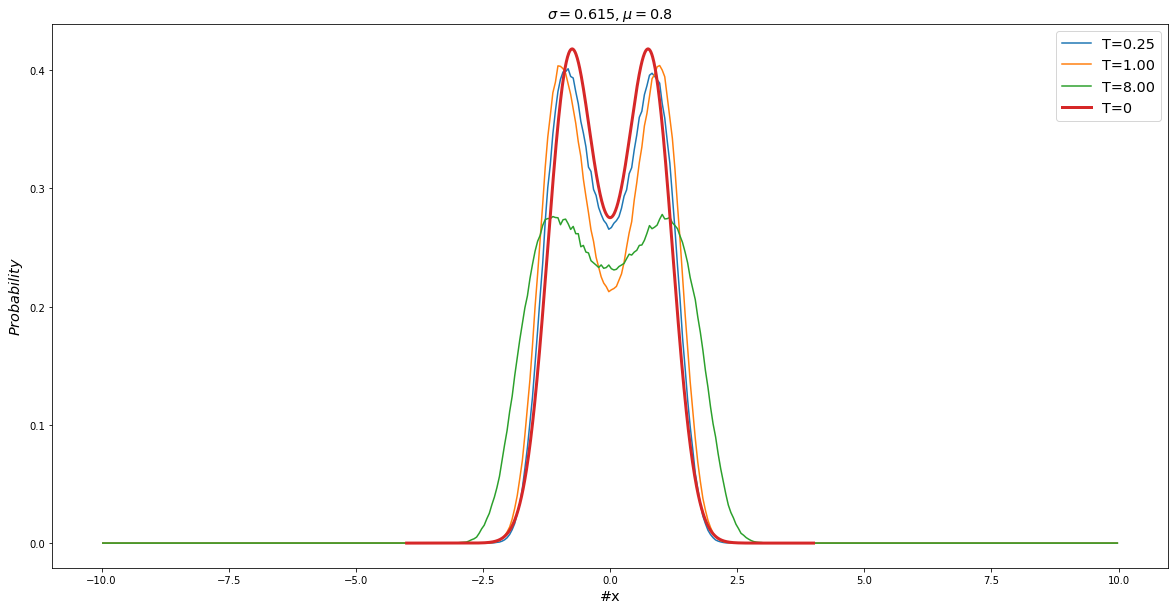

In [4]:
current_position025,hist_average025,error025= np.loadtxt("./QMC_1D/temp/probability0.25.dat", usecols=(0,1,2), unpack='true')
current_position1,hist_average1,error1= np.loadtxt("./QMC_1D/temp/probability1.dat", usecols=(0,1,2), unpack='true')
current_position8,hist_average8,error8= np.loadtxt("./QMC_1D/temp/probability8.dat", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(20,10))
plt.plot(current_position025,hist_average025,label="T=0.25")
plt.plot(current_position1,hist_average1,label="T=1.00")
plt.plot(current_position8,hist_average8,label="T=8.00")
plt.title(r'$\sigma=0.615, \mu=0.8$',fontsize='x-large')
plt.xlabel('#x',fontsize='x-large')
plt.ylabel(r'$Probability$',fontsize='x-large')
plt.legend(fontsize='x-large')

pi = 3.14159
a = 8
N = 1000 # number of iterations
x = np.linspace(-a/2, a/2, N)
mu = 0.81
sigma = 0.615
Eval = ( np.exp(-0.5*(((x-mu)/sigma)**2)) + np.exp(-0.5*(((x+mu)/sigma)**2)) )**2;
norm = 2*((pi**0.5)*sigma) *   ((math.exp(-(mu**2)/(sigma**2))) +1)
plt.plot(x, Eval/norm, linewidth=3.0, label='T=0')
plt.legend(fontsize='x-large')

plt.show()

La densità di probabilità a T=0 e temperatura finita cambia. Infatti andando ad aumentare la tempertatura si vanno a popolare anche degli stati eccitati che hanno un supporto più largo. In questo modo si possono vistare zone in cui il potenziale non è nel minimo, e questo dà luogo ad una espansione della distribuzione di probabilità, che in questo caso è il modulo quadro di una miscela di funzioni d'onda e non più il modulo quadro della sola funzione d'onda di ground state. 